In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")

In [2]:
import numpy as np

In [3]:
print(np.__version__)

1.22.3


In [4]:
import data_manipulation, data_visualization, data_dictionary, data_preprocessing

In [5]:
file_name = 'SEERA dataset original raw data'

In [6]:
original_data = data_manipulation.read_data(file_name, header = 1)
original_data

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,...,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,1,2015,1,1,1,16,7,13,2.0,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,...,1,3,6,6,8,1,16.6667,2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,1.88889,?,1,3,1,1,1,2,2,3,1
1,2,2016,25,5,1,2,1,2,2.0,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,...,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,4.55556,2,2,2,1,4,1,1,4,2,1
2,3,2008,2,5,3,2,2,3,3.0,5.0,0,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,...,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,1.44444,3,2,2,2,3,4,3,5,2,3
3,4,2009,42,4,2,3,2,4,6.0,6.0,-0.166667,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,...,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,1.44444,1,1,3,4,3,2,4,3,4,2
4,5,2016,42,4,2,3,2,4,12.0,24.0,-0.174444,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,...,4,3,9,9,8,1,44.4444,2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2018,38,1,2,16,1,13,2.0,3.0,?,4,7,65,2,NaN,528,792.0,6,3,1,1,1,7,2,2,3,0,6,3.25,3,4.555556,2.746032,1.000000,1,...,1,2,2,1,8,1,0,1,1,4,2,8,2,1,1,1,1,1,2,2,5,2,3,NaN,1.44444,4,1,1,4,3,2,1,2,3,2
116,117,1998,4,4,1,3,3,3,6.0,18.0,0,1,1,50,2,NaN,7128,21384.0,6,5,7,?,4,5,2,5,4,0,4,2.25,1,4.555556,1.000000,1.444444,3,...,2,3,5,4,12,2,20,6,3,3,4,8,1,1,7,2,2,0,3,NaN,4,3,3,NaN,4.11111,?,1,1,1,4,1,1,1,1,2
117,118,2006,14,2,2,16,6,13,2.0,5.0,?,1,5,11,2,NaN,352,880.0,8,4,1,1,1,8,1,2,2,1,4,1.75,1,1.888889,3.936508,1.444444,1,...,2,3,2,0,8,1,0,2,4,3,1,8,1,1,7,2,1,0,3,NaN,5,3,3,NaN,1.44444,1,4,3,4,4,1,1,2,1,1
118,119,2016,43,6,1,16,11,13,3.0,12.0,?,2,7,67,2,NaN,792,3168.0,6,4,2,1,1,7,3,2,4,1,6,2.25,2,1.888889,2.746032,4.111111,1,...,1,3,2,1,8,1,0,3,4,1,1,8,3,1,1,2,1,0,3,NaN,3,3,3,NaN,1.44444,1,1,3,1,1,2,1,2,3,2


In [7]:
data = original_data.copy()
data.index = data['ProjID']
data = data.drop(['ProjID', 'Organization id'], axis = 1)

In [8]:
data.columns

Index(['Year of project', 'Organization type', 'Role in organization',
       'Size of organization', 'Size of IT department',
       'Customer organization type', 'Estimated  duration', 'Actual duration',
       '% project gain (loss)', 'Development type', 'Application domain',
       'Object points', 'Other sizing method', 'Estimated size',
       'Estimated effort', 'Actual effort', 'Contract maturity',
       'Government policy impact', 'Economic instability impact',
       'Organization management structure clarity', 'Developer hiring policy',
       'Developer incentives policy ', 'Developer training',
       'Development team management', 'Top management support',
       'Top management opinion of previous system', 'Clarity of manual system',
       'User resistance', 'User computer experience', 'Users stability',
       'Requirment stability', 'Requirements flexibility',
       'Project manager experience', 'Consultant availability',
       'DBMS  expert availability', 'Precede

## Data types

In [9]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

##### `The Object datatype is due to the existing of '?' value in some rows as null value, so we should replace it with a null value`

In [10]:
data = data_preprocessing.define_missing_values(data)

## Correlation Matrix

In [11]:
#correlation_matrix = data_visualization.corr_matrix(data)

### `Most correlated columns with Actual Effort (Our target):`
1. Team Size
2. Dedicated Team members
3. Estimated Size
4. Estimated Effort

### `High correlations`
1. Other Sizing Methods / Estimated Size
2. Size of IT Department / Size of Organization
3. Team Size / Estimated Size
4. Dedicated Team members / Estimated Size
5. Requirements Flexibility / Estimated Size
6. Open Source Software / DBMS Used
7. Dedicated Team members / Team Size
8. Development Type / DBMS Used

##### `Columns with no meaning or to delete`
1. Object points 
2. Other sizing methods 
3. Contract maturity 
4. Government policy impact 
5. Year of the project

## Year Column visualization

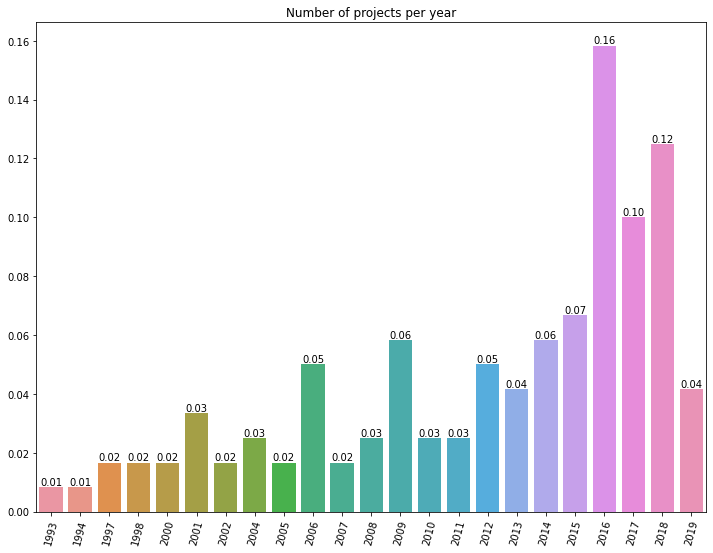

In [12]:
data_visualization.bar_plot_count(data['Year of project'], 
                           title = 'Number of projects per year')

#####   `It is clear that most of the projects are done in 2016`

# Categorical Columns

In [13]:
Categorical_columns = data_dictionary.categorical_cols_names()
print(Categorical_columns)

['Absence policy implementation', 'Application domain', 'Cohesion between developers and users', 'Comments within the code', 'Consequence for lack of work', 'Consultant availability', 'Customer organization type', 'DBMS expert availability', 'DBMS used', 'Degree of software reuse ', 'Developer hiring policy', 'Developer hiring policy', 'Developer training', 'Development type', 'Direct automation of the manual system', 'Fixed minimum working hours', 'Government policy impact', 'Income satisfaction', 'Level of outsourcing', 'Manual system experience', 'Methodology', 'Open source software', 'Organization management structure clarity', 'Organization type', 'Outsourcing impact', 'Product complexity', 'Programmers experience in programming language', 'Programming language used', 'Project manager experience', 'Reengineering', 'Reliability requirements', 'Required reusability', 'Requirement accuracy level', 'Risk management tool usage', 'Risk plan', 'Role in organization', 'Schedule quality', 

### We will only visualize columns that are in the main sheet, not others, so we create an intersection column that contains all categorical columns existing in data.columns

In [14]:
intersection = list(set(data.columns).intersection(Categorical_columns))
intersection.sort()

### **Visualize columns with no missing values**

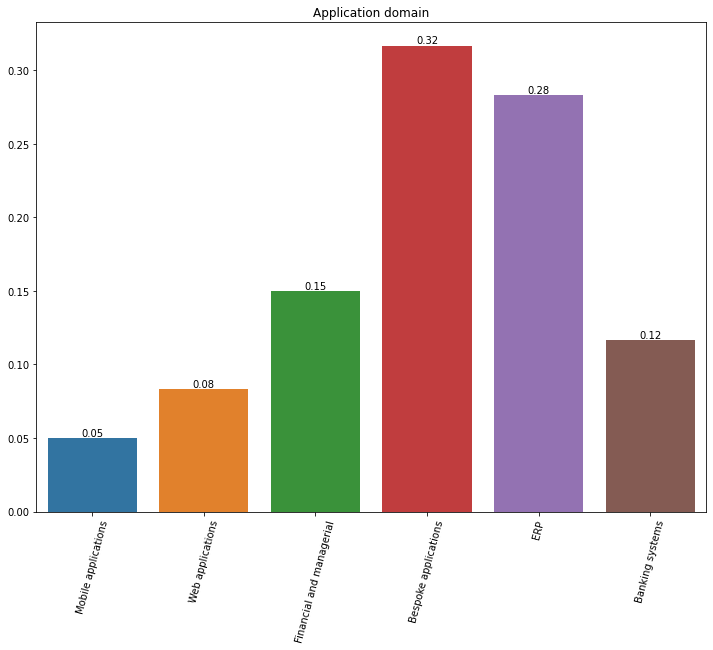

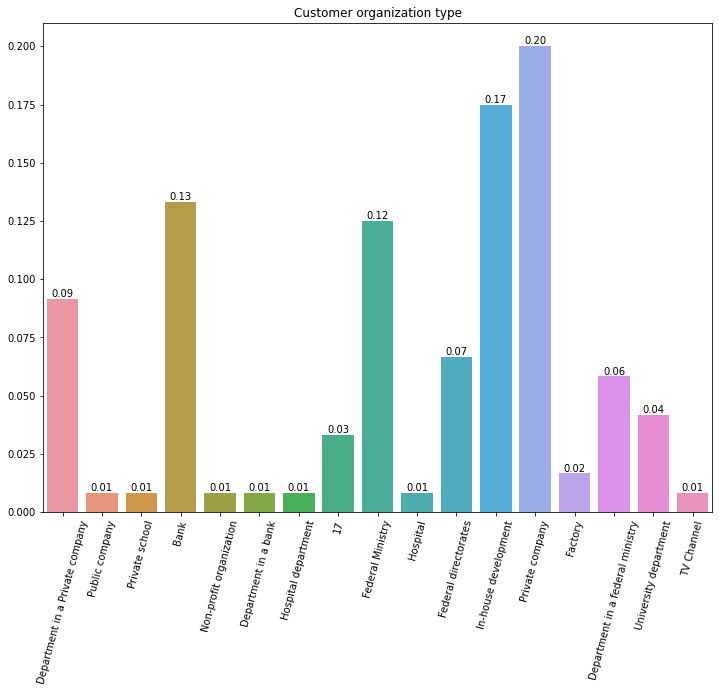

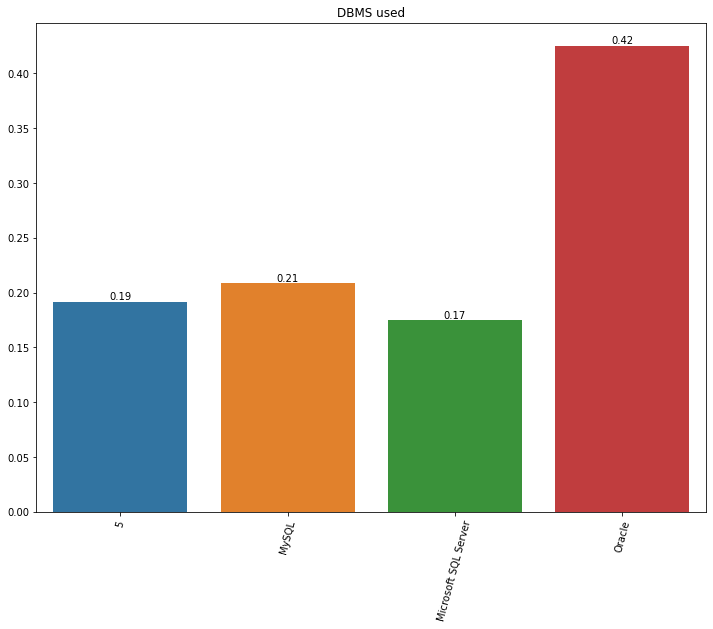

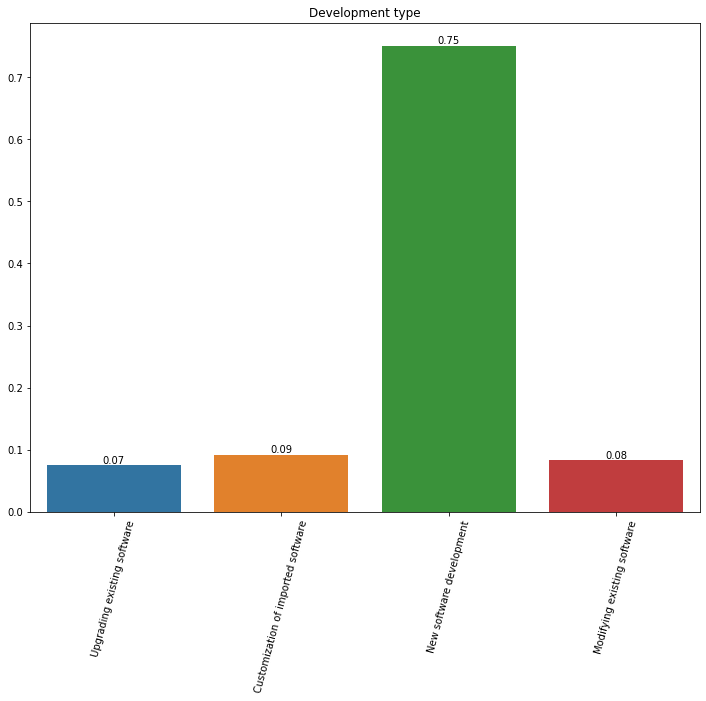

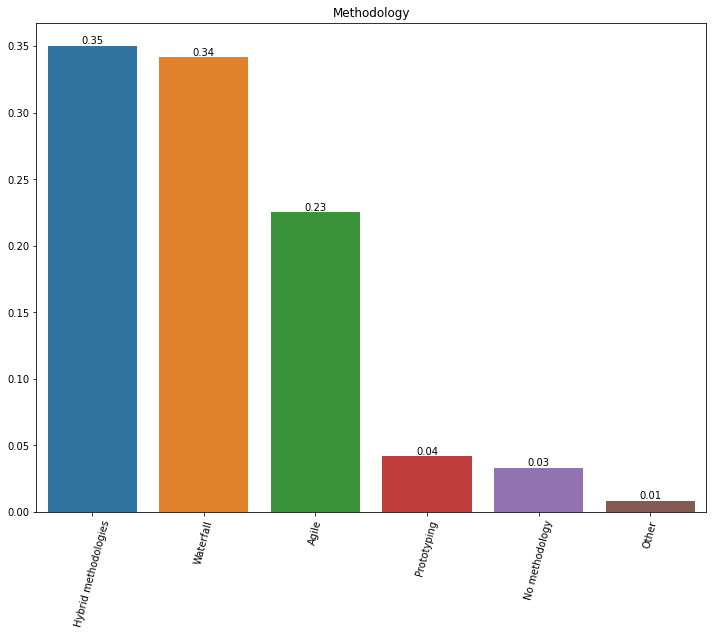

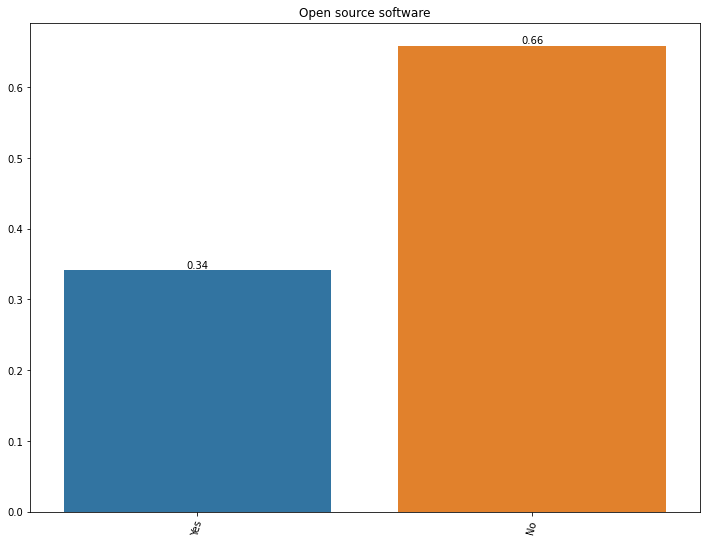

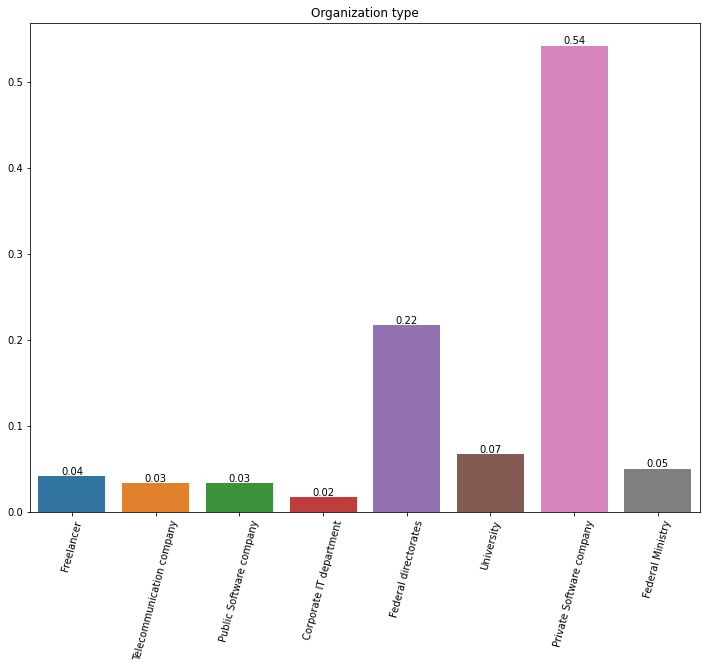

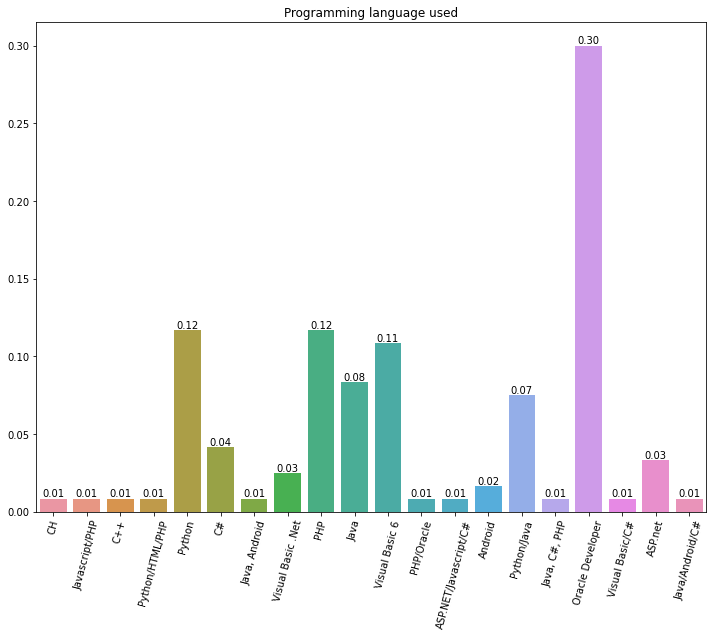

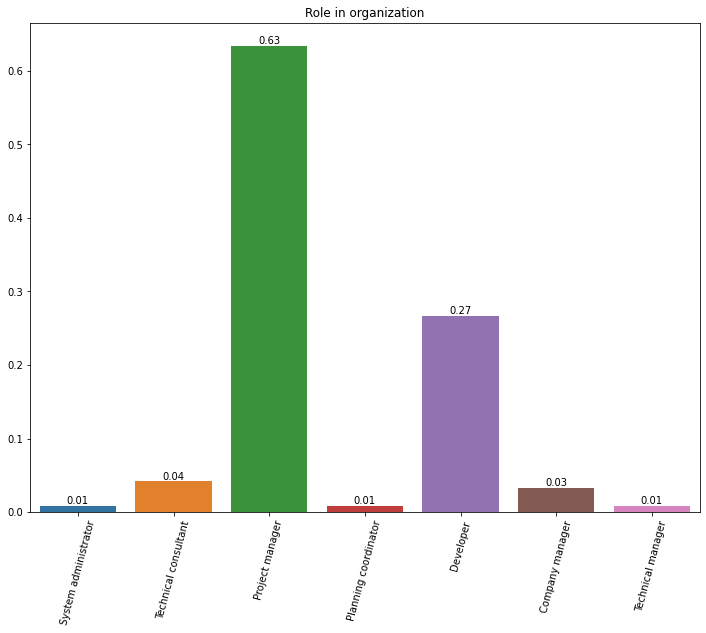

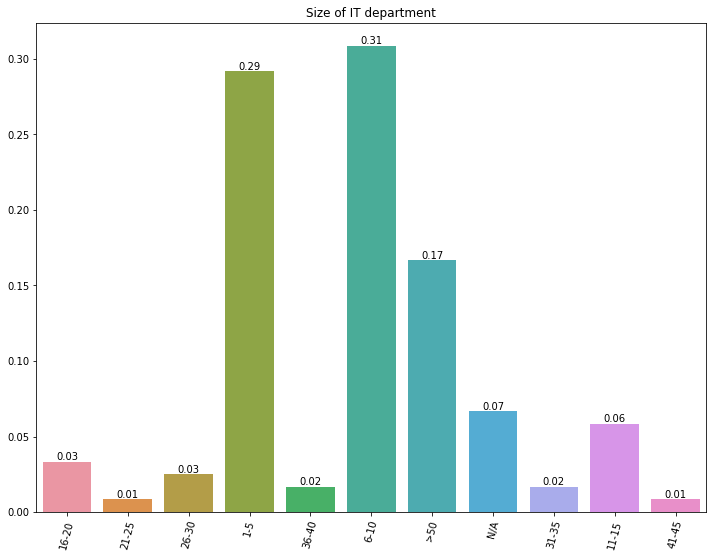

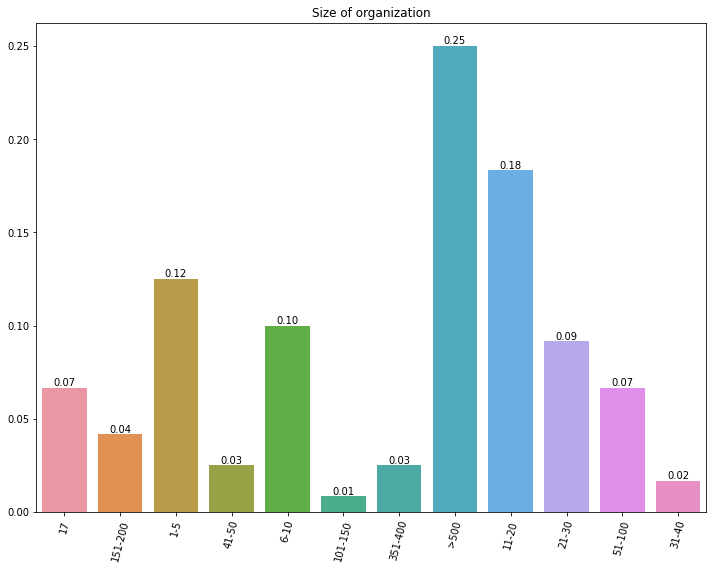

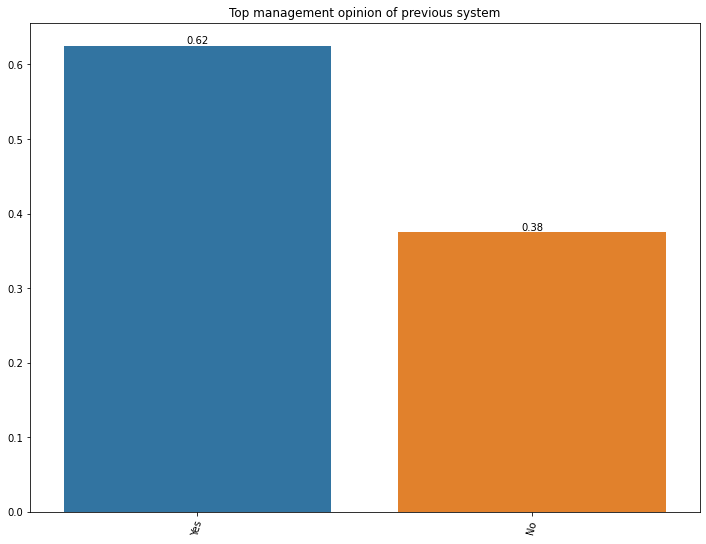

In [15]:
for col in intersection:
    if data[col].isna().sum() == 0:
        data_visualization.bar_plot_count(data[col], 
                                   title          = col, 
                                   values_meaning = data_dictionary.values_meaning(col))

## Results
1. `In 'Customer Organization Type', '17' value is not defined in our data_dictionary`
2. `75% of projects are ` **`New Software Projects`**
3. `54% of Organizations are ` **`Private Software Companies`**
4. `63% of Organizations are Role in Organization` **`Project Managers`**

##### **Visualize columns with missing values**

c:\Users\User\Desktop\INSEA\MFE\Software Cost Estimation Project\src\data_visualization.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10, 10))


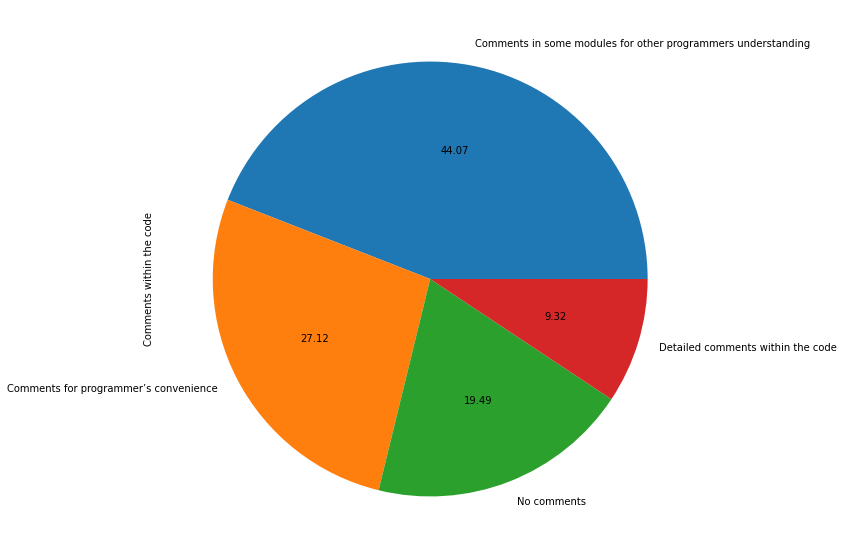

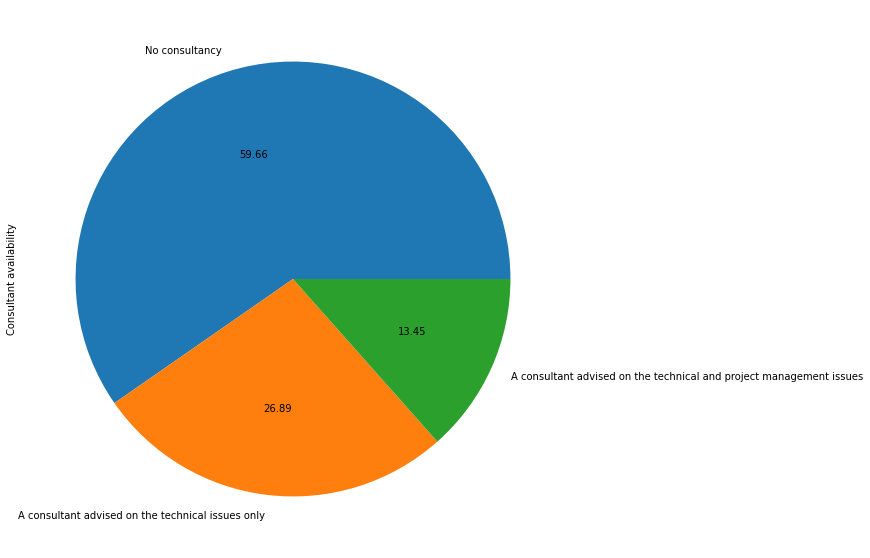

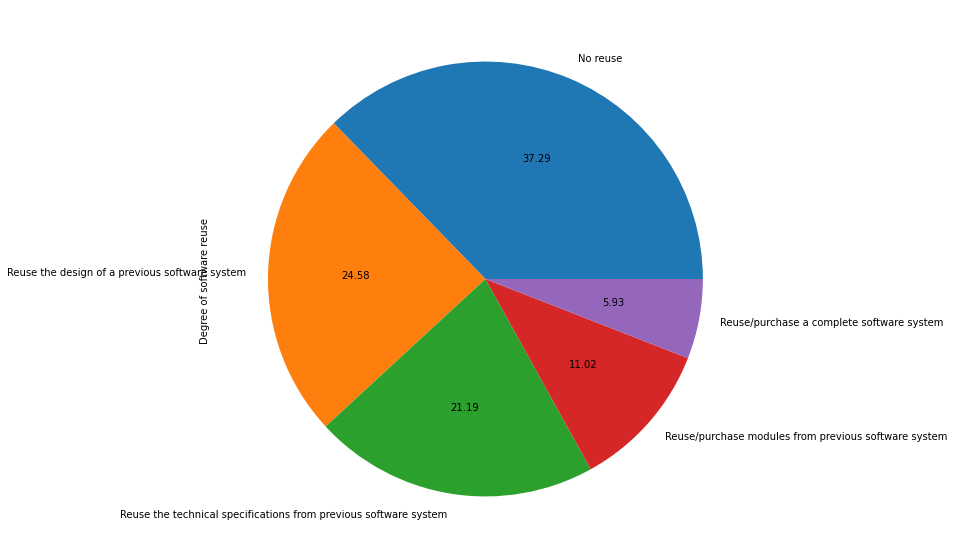

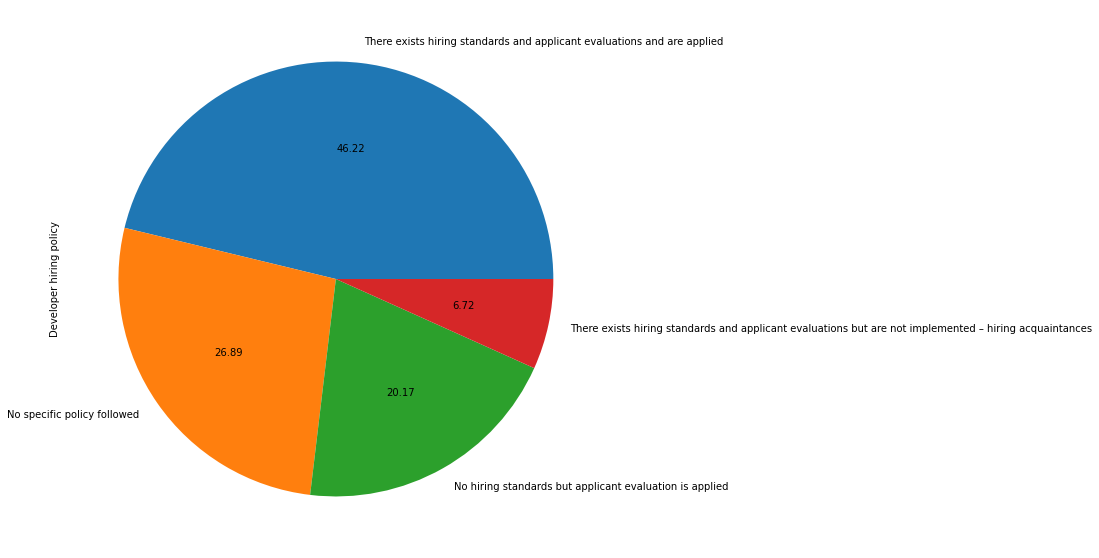

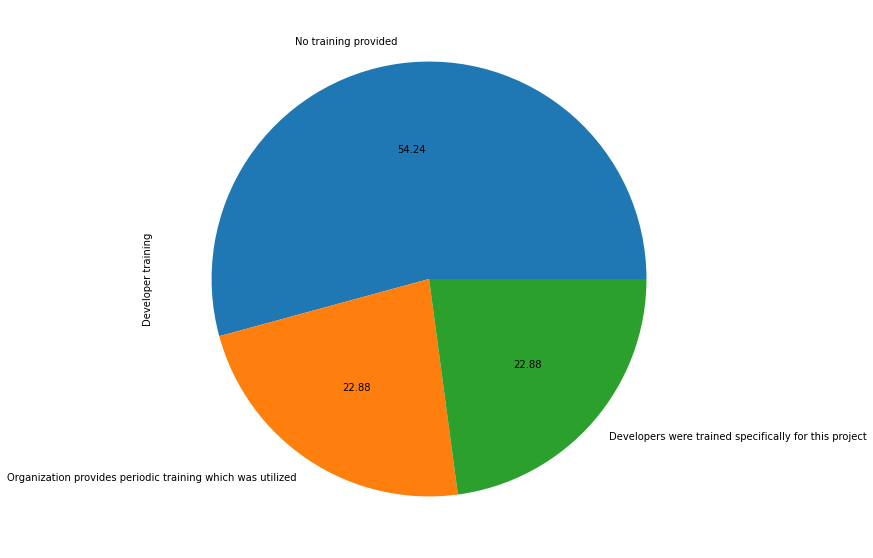

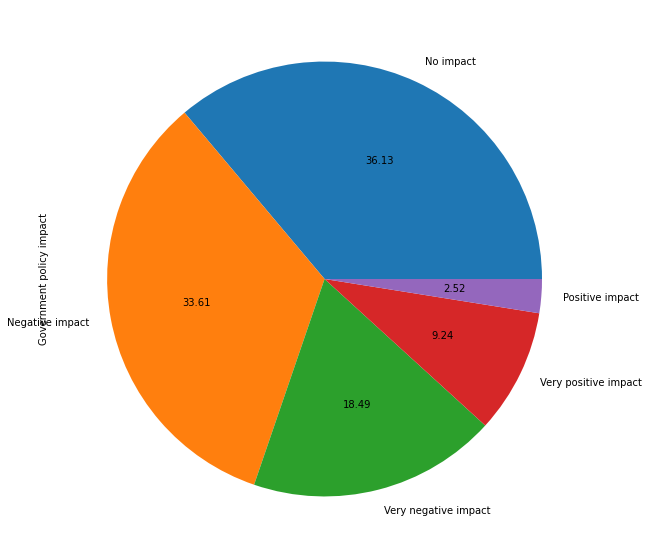

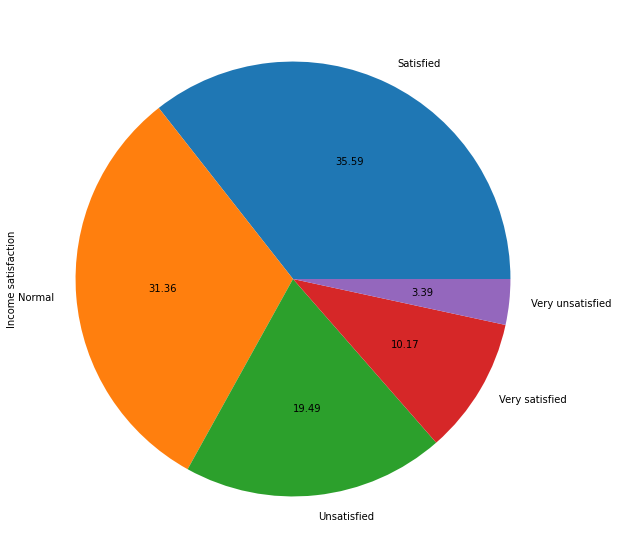

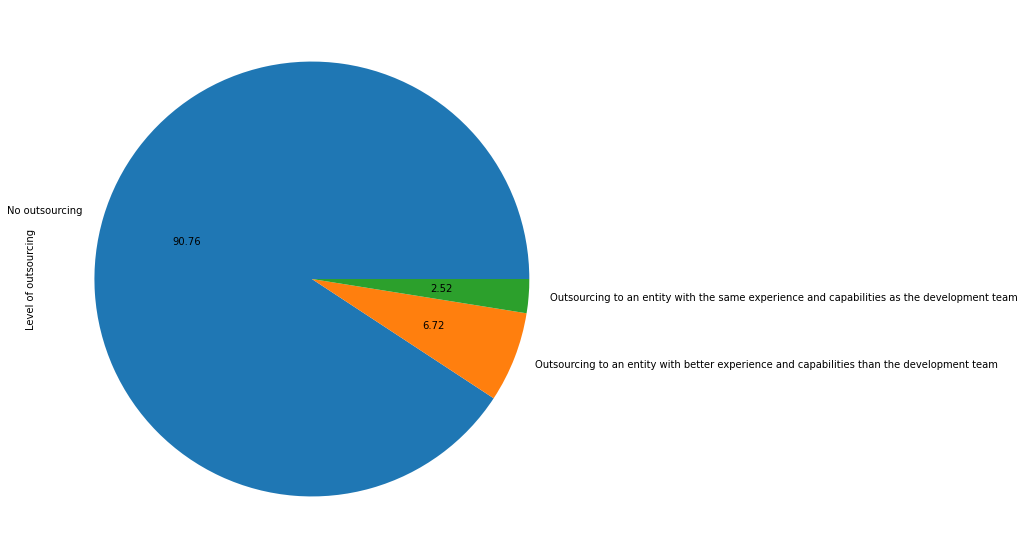

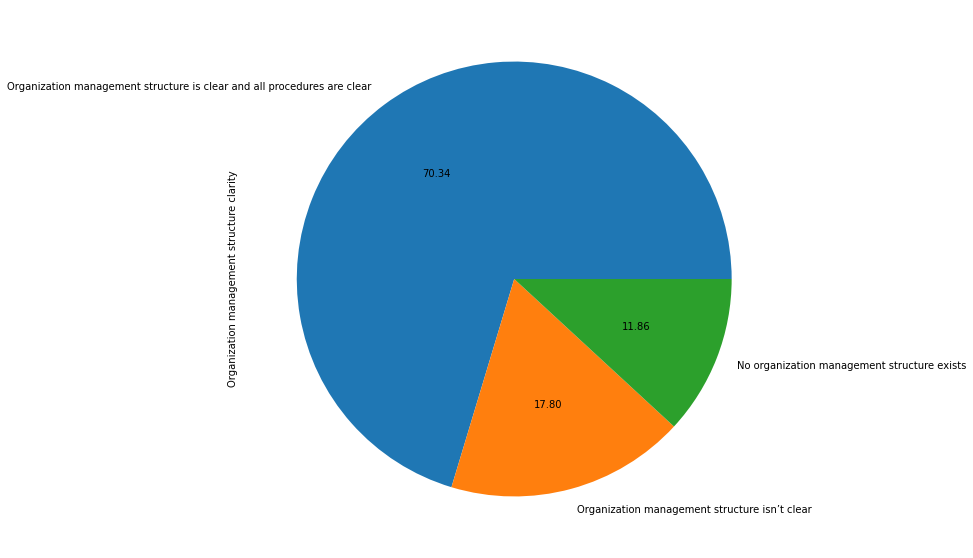

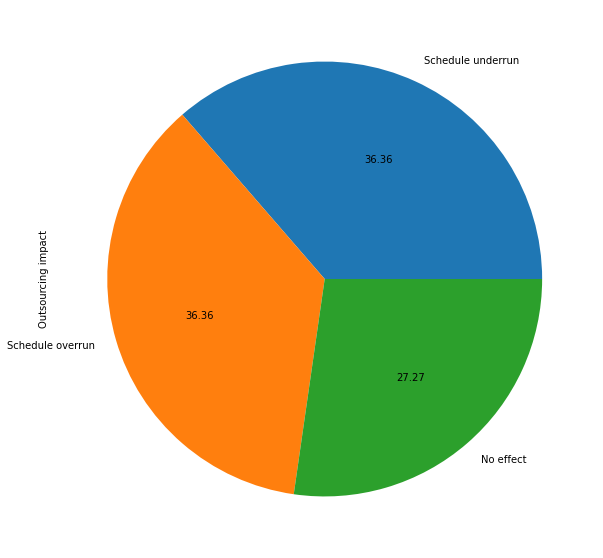

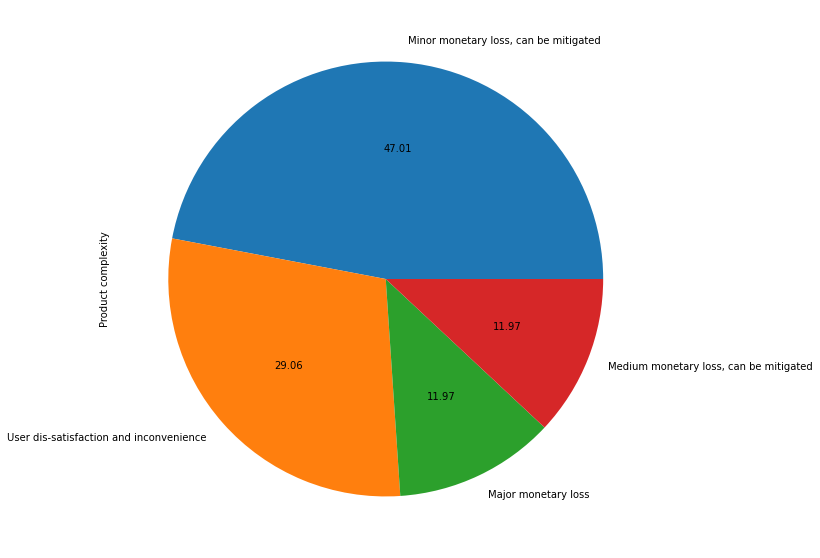

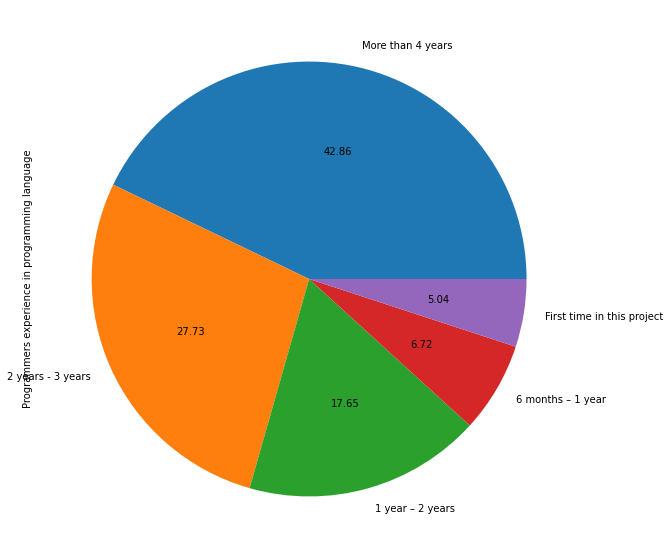

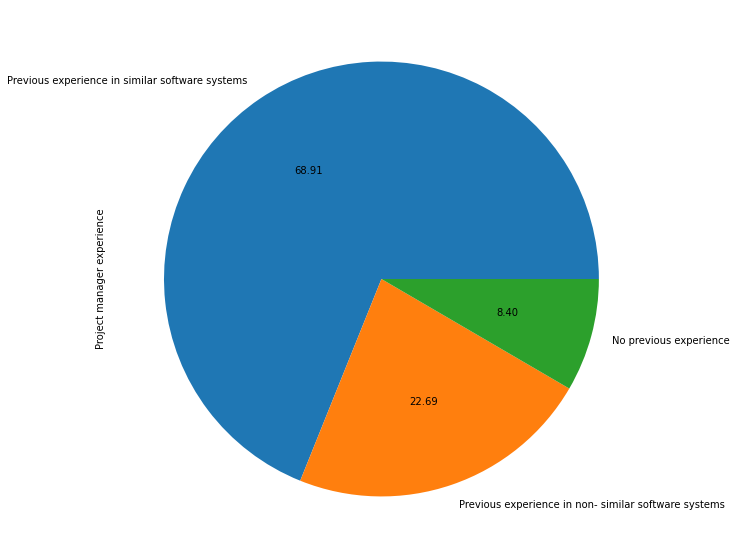

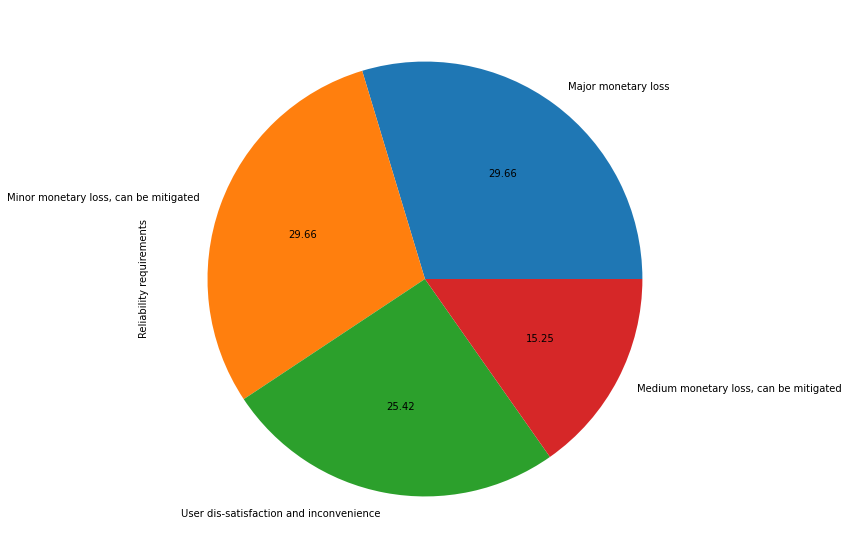

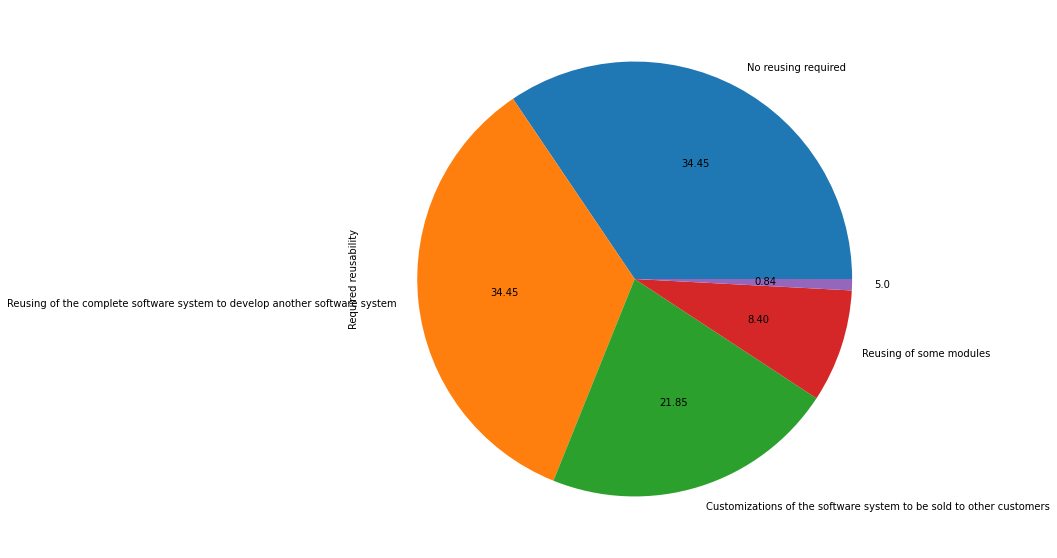

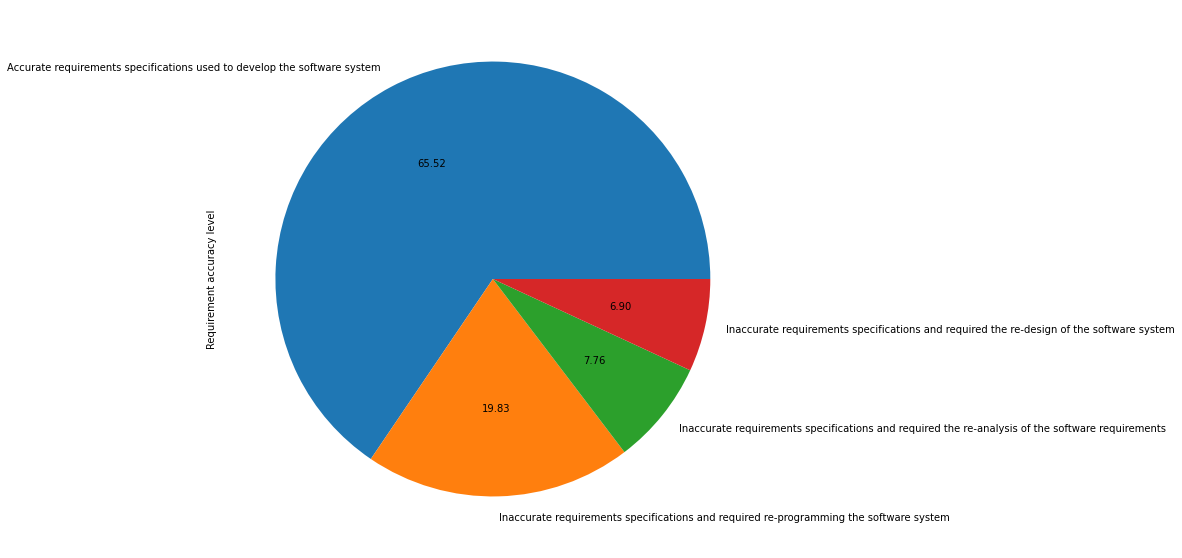

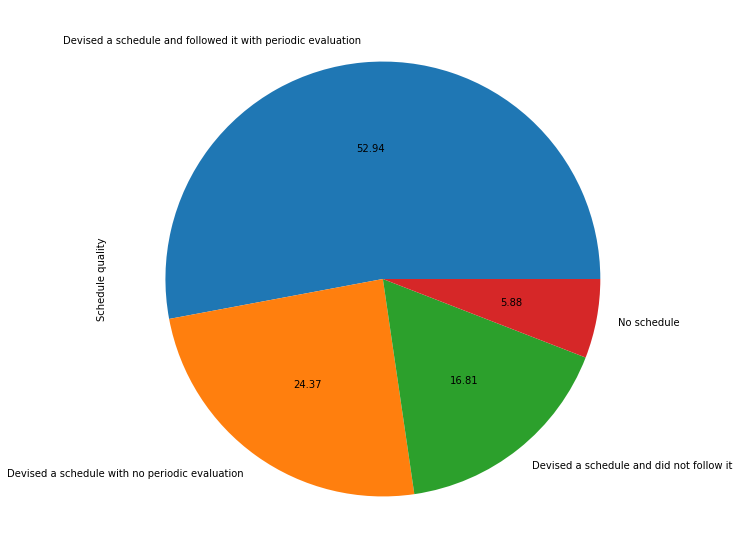

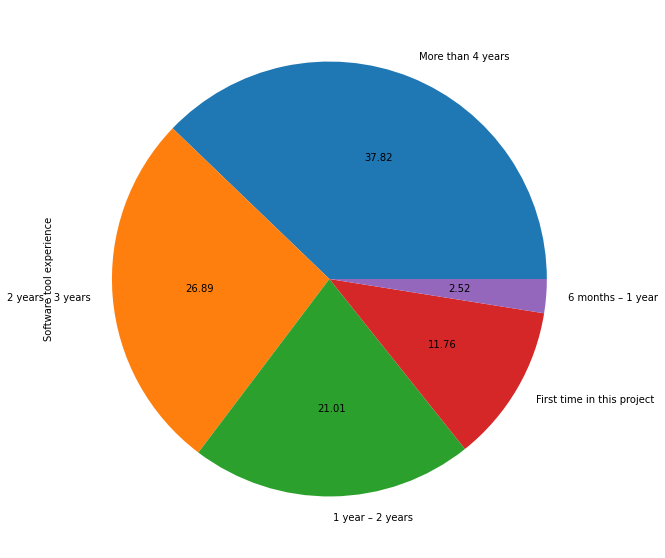

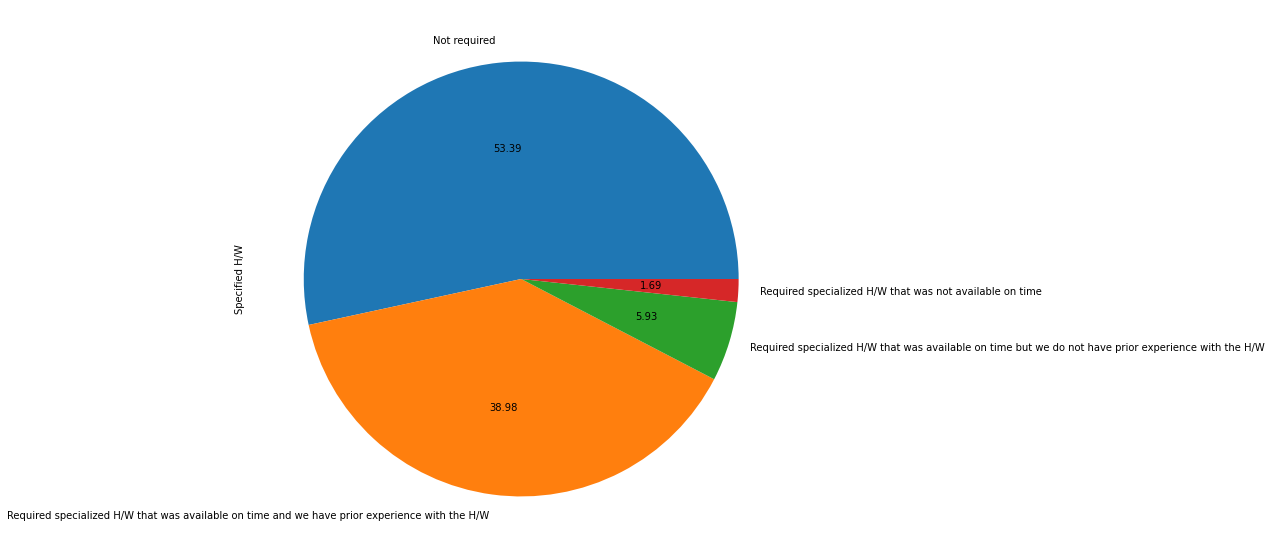

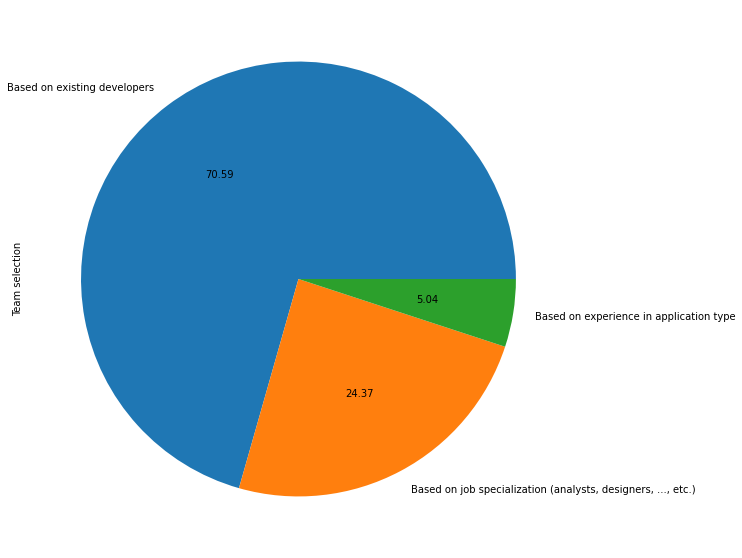

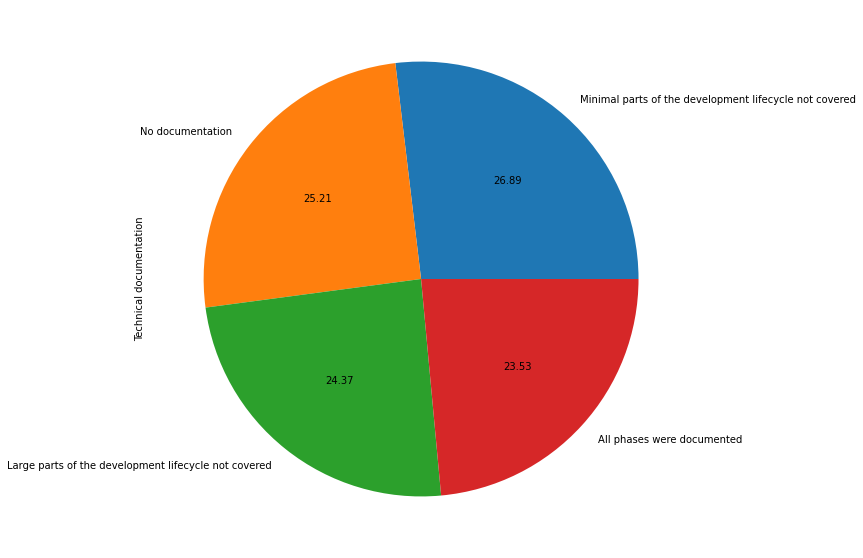

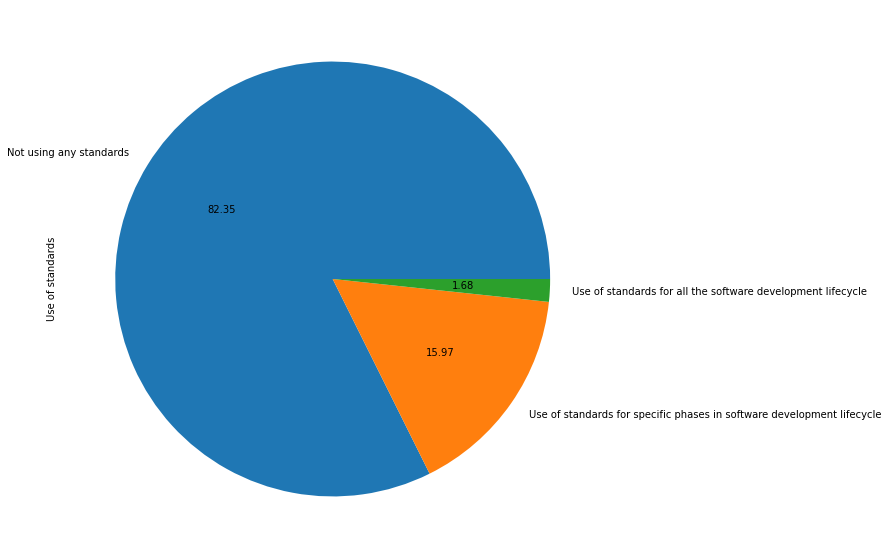

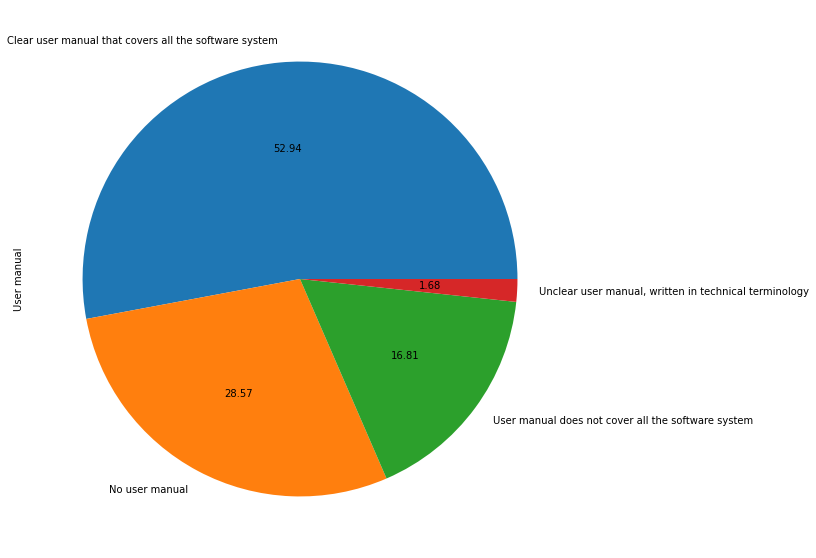

In [16]:
for col in intersection:
    if data[col].isna().sum() != 0 :
        data_visualization.pie_plot(data[col], data_dictionary.values_meaning(col))

## Results
1. `90.76% of projects have no ` **`outsourcing level`**
2. `The distribution of values in Technical Documentation is balanced`

# Numerical Data

In [19]:
Numerical_data = set(data.columns) - set(Categorical_columns)
Numerical_data

{'% project gain (loss)',
 'Actual duration',
 'Actual effort',
 'Analysts capability ',
 'Clarity of manual system',
 'Contract maturity',
 'DBMS  expert availability',
 'Daily working hours',
 'Dedicated team members',
 'Degree of risk management',
 'Degree of standards usage',
 'Developer incentives policy ',
 'Development environment adequacy',
 'Development team management',
 'Economic instability impact',
 'Estimated  duration',
 'Estimated effort',
 'Estimated size',
 'Multiple programing languages ',
 'Object points',
 'Other sizing method',
 'Performance requirements',
 'Precedentedness',
 'Process reengineering',
 'Programmers capability ',
 'Requirements flexibility',
 'Requirment stability',
 'Security requirements',
 'Team cohesion',
 'Team continuity ',
 'Team contracts',
 'Team size',
 'Technical stability',
 'Tool availability ',
 'Top management support',
 'User computer experience',
 'User resistance',
 'Users stability',
 'Year of project'}